# Tarea 2

## Challenge 1

<div class="alert alert-danger">
  <strong>CHALLENGE 1</strong>
    <br> * Create a public repo named "week2_spatial" with its README file. (1 point)
    <br> * Clone the repo to your computer. (1 point)
    <br> * In the local repo in your computer, create a folder named "data". (1 point)
    <br> * Get Three maps for the same country: the lines can be rivers, highways or similar; the points have to be airports; and the polygons  of the 2rd administrative division ('provinces' in Perú, 'counties' in USA). Download those maps into the "data" folder. You can find airports here: https://ourairports.com/data/ (5 points)
    <br> * Plot in one map the three layers of maps, including the code. (5 points)
    <br> * Publish the three layer map. (3 points)
    <br> * Update the README to offer a quick explanation, the data dictionary, and the link to the published map. (2 points)
    <br> * Make sure the code is well organized (explanations, comments, no warnings, no python messages). (2 points)
    
</div>

By Michael Encalada

### Subir mapas

Leer los archivos con **geopandas**:

In [1]:
import os, geopandas as gpd

Lidiar con los Warnings

In [2]:
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [3]:
#revisar el directorio
print(os.getcwd())

C:\Users\Michael Encalada\Documents\GitHub\Magallanes\week2_spatial


In [4]:
os.chdir("C:/Users/Michael Encalada/Documents/GitHub/Magallanes/week2_spatial")

In [5]:
#subir archivos
countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [6]:
# Revisar
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [7]:
# Revisar missing values
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [8]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


Abrir los otros archivos

In [9]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

Verificar la misma proyección de las capas (**CRS**):

In [10]:
countries.crs==cities.crs==cities.crs

True

## Subseteo

Filtrar por el país de "Panama"

In [11]:
panama=countries[countries.COUNTRY=='Panama']

Realizar lo mismo con los otros datos

In [12]:
citiesPanama_clipped = gpd.clip(gdf=cities,
                          mask=panama)
riversPanama_clipped = gpd.clip(gdf=rivers,
                               mask=panama)

Then, you can plot the clipped version:

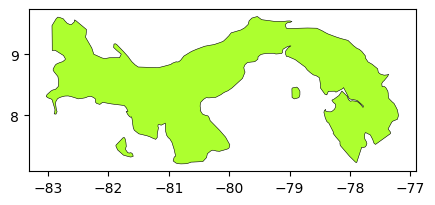

In [13]:
base = panama.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))


Revisar el archivo

In [14]:
panama.geom_type

177    MultiPolygon
dtype: object

<a class="anchor" id="1"></a>

## Map Projection

In [15]:
# check units
panama.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

Calcular el centroide

In [16]:
# centroid
panama.centroid

C:\Users\Michael Encalada\AppData\Local\Temp\ipykernel_12476\905011849.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  panama.centroid


177    POINT (-80.10110 8.50648)
dtype: geometry

### Reprojección

In [17]:
# recommended for Panama (meters)
panama.to_crs(5469).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [18]:
# now this works
panama.to_crs(5469).centroid

177    POINT (488913.641 305099.363)
dtype: geometry

<Axes: >

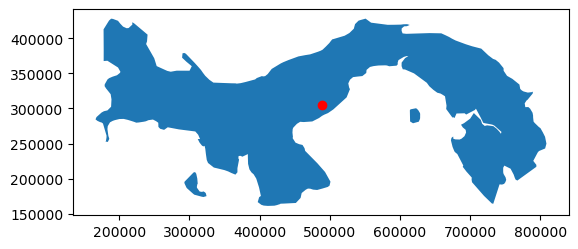

In [19]:
# replotting:

base5469=panama.to_crs(5469).plot()
panama.to_crs(5469).centroid.plot(color='red',ax=base5469)

Let's keep the projected version for all our maps:

In [20]:
panama_5469=panama.to_crs(5469)

In [21]:
# saving
import os

panama_5469.to_file(os.path.join("maps","panamaMaps_5469.gpkg"), layer='country', driver="GPKG")

C:\Users\Michael Encalada\anaconda3\envs\Magallanes_Taller\Lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [22]:
panama_5469.centroid

177    POINT (488913.641 305099.363)
dtype: geometry

In [23]:
panama_5469.centroid.to_file(os.path.join("maps","panamaMaps_5469.gpkg"), layer='centroid', driver="GPKG")

C:\Users\Michael Encalada\anaconda3\envs\Magallanes_Taller\Lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Aeropuertos

In [24]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","pa-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,4793,MPTO,large_airport,Tocumen International Airport,9.071360,-79.383499,135.0,NaN,Panama,PA,...,Tocumen,1,MPTO,PTY,NaN,https://www.tocumenpanama.aero/,https://en.wikipedia.org/wiki/Tocumen_Internat...,La Joya No 1,1050,2024-04-29T19:09:59+00:00
1,4791,MPMG,medium_airport,Marcos A. Gelabert International Airport,8.973340,-79.555603,31.0,NaN,Panama,PA,...,Albrook,1,MPMG,PAC,NaN,NaN,https://en.wikipedia.org/wiki/Albrook_%22Marco...,Balboa. Albrook AFS. MPLB,750,2024-05-18T12:23:24+00:00
2,30768,MPHO,small_airport,Panamá Pacífico International Airport,8.914790,-79.599602,52.0,NaN,Panama,PA,...,Panamá City,1,MPPA,BLB,NaN,http://www.panamapacifico.com/,https://en.wikipedia.org/wiki/Panam%C3%A1_Pac%...,"HOW, Howard Air Force Base, Panama Pacifico",100,2021-01-12T11:57:17+00:00
3,4786,MPBO,medium_airport,Bocas del Toro International Airport,9.340850,-82.250801,10.0,NaN,Panama,PA,...,Isla Colón,1,MPBO,BOC,NaN,NaN,https://en.wikipedia.org/wiki/Bocas_del_Toro_%...,Jose Ezequiel Hall,750,2021-08-07T11:19:30+00:00
87,505212,PA-0035,closed,Ingenio Las Cabras Airstrip,7.900440,-80.540391,112.0,NaN,Panama,PA,...,Las Cabras,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-12-01T19:01:28+00:00
88,506055,PA-0041,closed,Limones Airstrip,7.619267,-80.946937,141.0,NaN,Panama,PA,...,Limones,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-01-13T20:27:06+00:00
89,506054,PA-0040,closed,La Providencia Airstrip,7.887800,-80.978748,121.0,NaN,Panama,PA,...,Ponuga,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-01-13T20:11:19+00:00
90,430649,PA-0033,heliport,Soloy Heliport,8.483100,-82.081600,424.0,NaN,Panama,PA,...,Soloy,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-10-23T00:48:07+00:00


Limpiar data

In [25]:
# bye first row
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,4791,MPMG,medium_airport,Marcos A. Gelabert International Airport,8.97334,-79.555603,31.0,NaN,Panama,PA,...,Albrook,1,MPMG,PAC,NaN,NaN,https://en.wikipedia.org/wiki/Albrook_%22Marco...,Balboa. Albrook AFS. MPLB,750,2024-05-18T12:23:24+00:00
1,30768,MPHO,small_airport,Panamá Pacífico International Airport,8.91479,-79.599602,52.0,NaN,Panama,PA,...,Panamá City,1,MPPA,BLB,NaN,http://www.panamapacifico.com/,https://en.wikipedia.org/wiki/Panam%C3%A1_Pac%...,"HOW, Howard Air Force Base, Panama Pacifico",100,2021-01-12T11:57:17+00:00
2,4786,MPBO,medium_airport,Bocas del Toro International Airport,9.34085,-82.250801,10.0,NaN,Panama,PA,...,Isla Colón,1,MPBO,BOC,NaN,NaN,https://en.wikipedia.org/wiki/Bocas_del_Toro_%...,Jose Ezequiel Hall,750,2021-08-07T11:19:30+00:00
3,4789,MPDA,medium_airport,Enrique Malek International Airport,8.39100,-82.434998,89.0,NaN,Panama,PA,...,David,1,MPDA,DAV,NaN,NaN,https://en.wikipedia.org/wiki/Enrique_Malek_In...,NaN,750,2021-08-07T11:30:19+00:00
4,4790,MPEJ,medium_airport,Enrique Adolfo Jimenez Airport,9.35664,-79.867401,25.0,NaN,Panama,PA,...,Colón,1,MPEJ,ONX,NaN,NaN,https://en.wikipedia.org/wiki/Enrique_Adolfo_J...,NaN,750,2024-05-18T12:22:03+00:00


In [26]:
# keep the  columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [27]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [28]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           90 non-null     object 
 1   type           90 non-null     object 
 2   latitude_deg   90 non-null     float64
 3   longitude_deg  90 non-null     float64
 4   elevation_ft   89 non-null     float64
 5   region_name    90 non-null     object 
 6   municipality   90 non-null     object 
dtypes: float64(3), object(4)
memory usage: 5.1+ KB


Fomateo

In [29]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           90 non-null     object 
 1   type           90 non-null     object 
 2   latitude_deg   90 non-null     float64
 3   longitude_deg  90 non-null     float64
 4   elevation_ft   89 non-null     float64
 5   region_name    90 non-null     object 
 6   municipality   90 non-null     object 
dtypes: float64(3), object(4)
memory usage: 5.1+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

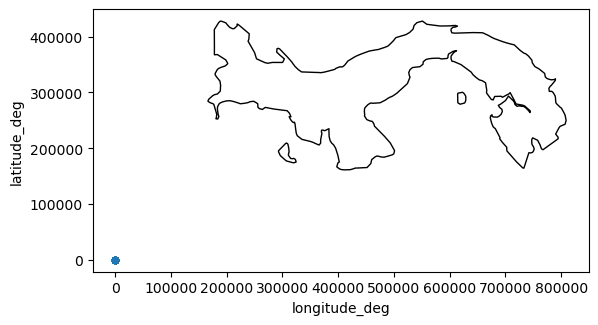

In [30]:
# let's plot

base = panama_5469.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

Corregir error

In [34]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=panama.crs.to_epsg())# the coordinates were in degrees - unprojected


Primera prueba

<Axes: >

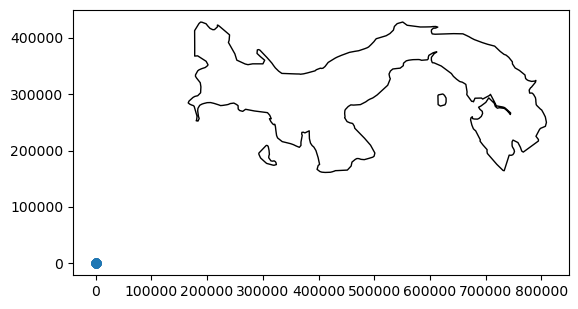

In [35]:
# does it look better?

# let's plot

base =panama_5469.plot(color='white', edgecolor='black')
airports.plot(ax=base)

Tipo de datos

In [36]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

Mapa con los datos proyectados

<Axes: >

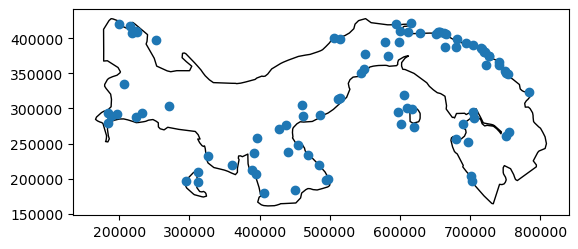

In [37]:
airports_5469=airports.to_crs(5469)

## then

base = panama_5469.plot(color='white', edgecolor='black')
airports_5469.plot(ax=base)

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Publicar

In [40]:
# adding the airports
airports_5469.to_file(os.path.join("maps","panamaMaps_5641.gpkg"), layer='airports', driver="GPKG")

# FIN